In [3]:
import pandas as pd
from google.colab import files

# Step 2: Upload the file
uploaded = files.upload()  # This will open a file upload dialog

Saving Tumor_Detection.csv to Tumor_Detection.csv


Dataset loaded successfully.
Initial 5 rows of the dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

 

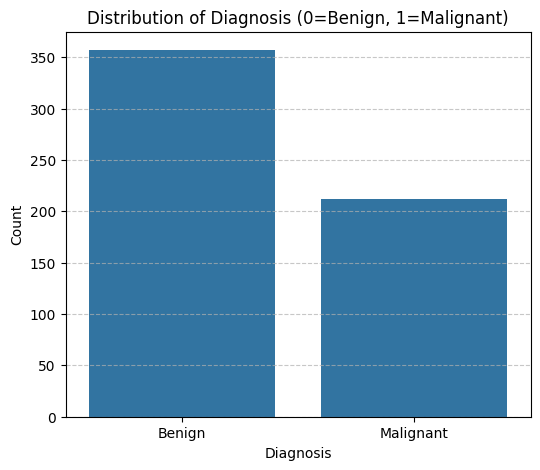

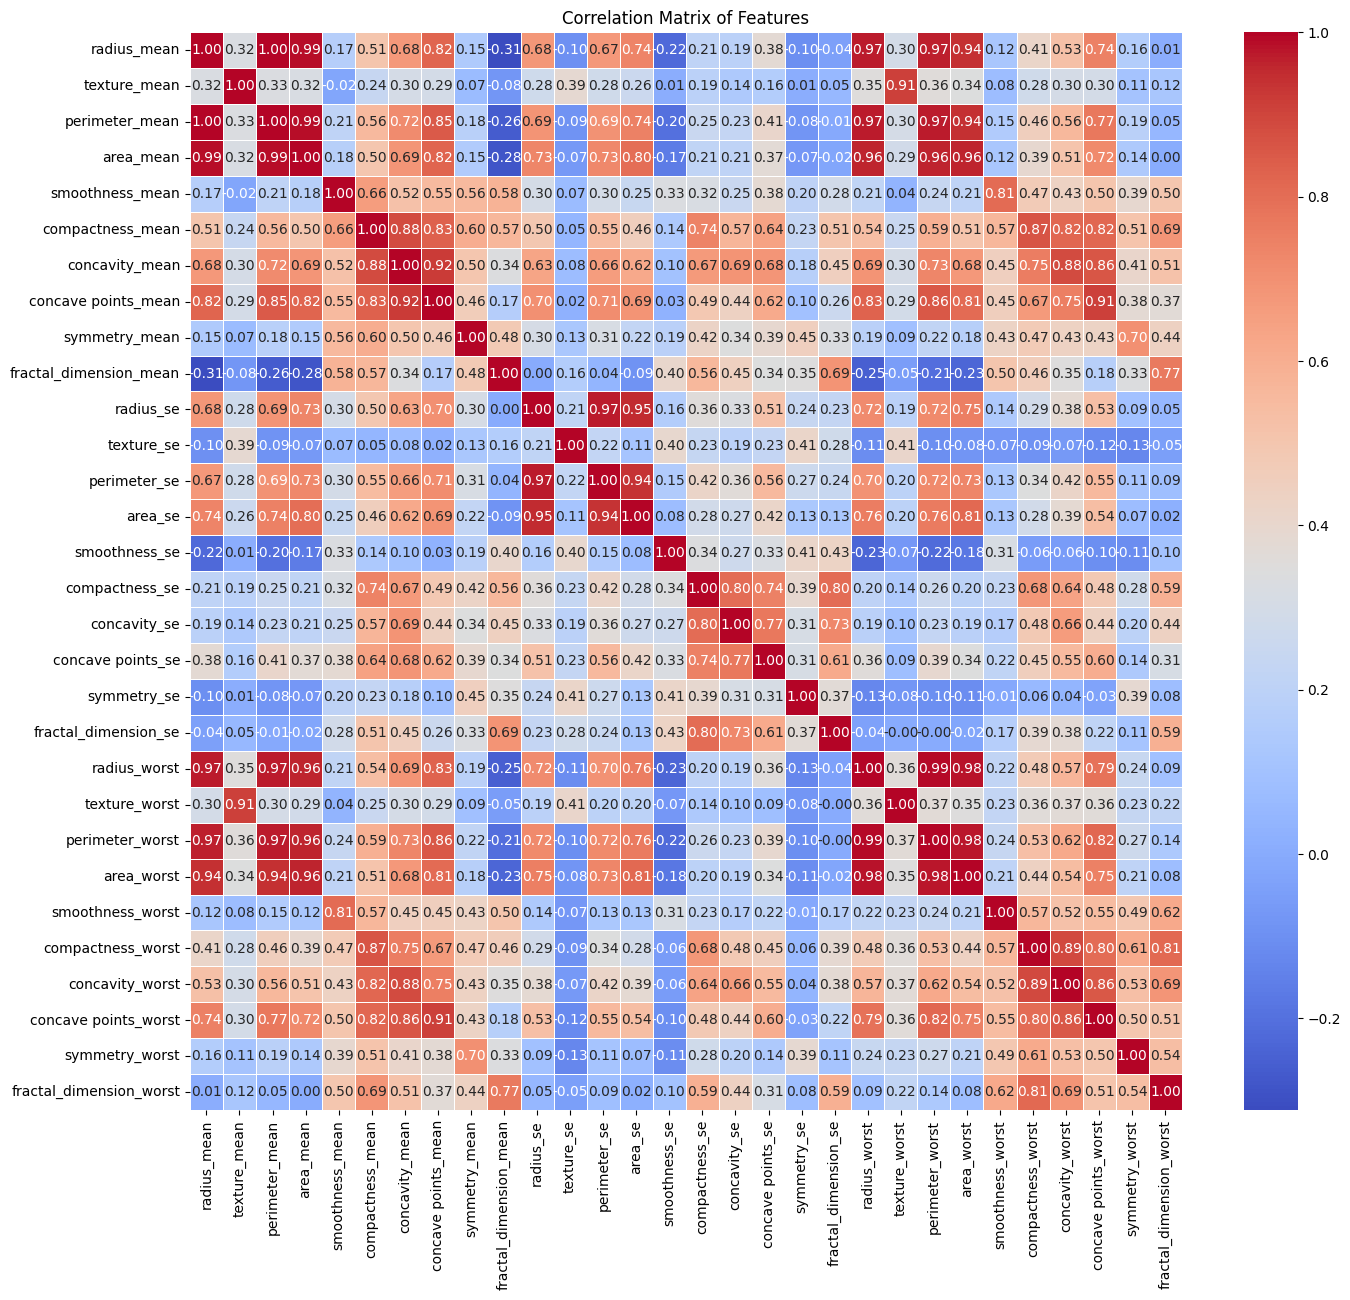


Features (X) shape: (569, 30)
Target (y) shape: (569,)

Training set size: 455 samples
Testing set size: 114 samples
Proportion of Malignant in Training: 0.37
Proportion of Malignant in Testing: 0.37

Features standardized.
X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)

First 5 rows of X_train_scaled:
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.518559      0.891826        0.424632   0.383925        -0.974744   
1    -0.516364     -1.639710       -0.541349  -0.542961         0.476219   
2    -0.368118      0.455515       -0.388250  -0.402970        -1.432979   
3     0.205285      0.726168        0.400330   0.070612         0.243253   
4     1.243005      0.194195        1.210377   1.206652        -0.111442   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.689772       -0.688586            -0.398175      -1.039155   
1         -0.631834       -0.604281            -0.303075       0.521543

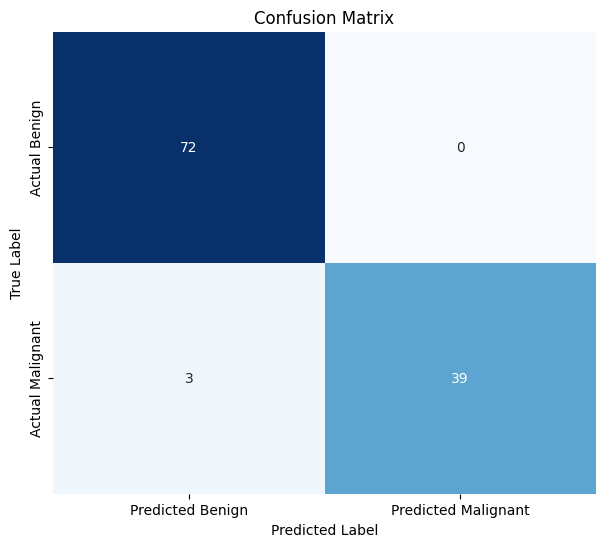


--- Project Completed Successfully ---
The model has been trained and evaluated.
Visualizations for diagnosis distribution, feature correlation, and confusion matrix have been generated.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Load the Dataset ---
# Problem Statement: Load the Tumor_Detection dataset from a CSV file.
# Note: This code assumes 'Tumor_Detection.csv' is in the same directory.
# If not, please provide the full path to the file.
try:
    df = pd.read_csv('Tumor_Detection.csv')
    print("Dataset loaded successfully.")
    print("Initial 5 rows of the dataset:\n", df.head())
    print("\nDataset Info:\n")
    df.info()
except FileNotFoundError:
    print("Error: 'Tumor_Detection.csv' not found. Please ensure the file is in the correct directory.")
    print("Exiting program.")
    exit()

# --- 2. Data Cleaning ---
# Problem Statement: Clean the data by removing irrelevant columns such as 'id' and unnamed extra fields.

# Drop 'id' column as it's just an identifier and not useful for prediction.
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("\n'id' column dropped.")

# Identify and remove any unnamed columns, often created during CSV export/import.
# Columns typically look like 'Unnamed: X'
unnamed_cols = [col for col in df.columns if 'Unnamed:' in col]
if unnamed_cols:
    df = df.drop(columns=unnamed_cols)
    print(f"Dropped unnamed columns: {unnamed_cols}")

print("\nDataset after dropping irrelevant columns (first 5 rows):\n", df.head())

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())
# As per problem statement, no explicit handling for missing values is required if none exist.
# If there were missing values, common approaches include imputation (mean, median, mode) or dropping rows/columns.

# --- 3. Exploratory Data Analysis (EDA) ---

# Problem Statement: Perform EDA to understand the distribution of diagnosis labels,
# calculate correlations between features, and visualize them using heatmaps.

# Convert 'diagnosis' column to numerical for easier analysis and modeling (M=1, B=0)
# This mapping is standard for binary classification where 'M' often represents the positive class.
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\n'diagnosis' column mapped to numerical (M=1, B=0):\n", df['diagnosis'].head())


# Distribution of diagnosis labels (Malignant vs. Benign)
plt.figure(figsize=(6, 5))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate correlations between features
# Exclude 'diagnosis' column itself when calculating feature correlations for the heatmap,
# as we are interested in correlations *between* features.
correlation_matrix = df.drop('diagnosis', axis=1).corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

# --- 4. Data Preprocessing ---

# Problem Statement: Preprocess the data using standard scaling and split it into training and testing sets.

# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1) # All columns except 'diagnosis' are features
y = df['diagnosis']             # 'diagnosis' is the target variable

print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Split data into training and testing sets
# test_size=0.20 means 20% of data will be used for testing, 80% for training.
# random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# stratify=y ensures that the proportion of target variable 'y' is the same in both
# training and testing sets, which is crucial for imbalanced datasets.

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Proportion of Malignant in Training: {y_train.sum()/len(y_train):.2f}")
print(f"Proportion of Malignant in Testing: {y_test.sum()/len(y_test):.2f}")

# Standardize the features
# StandardScaler transforms features to have a mean of 0 and a standard deviation of 1.
# It's important to fit the scaler ONLY on the training data to prevent data leakage.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Transform test data using the scaler fitted on training data

print("\nFeatures standardized.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# Convert scaled arrays back to DataFrame for easier inspection (optional, but good for understanding)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
print("\nFirst 5 rows of X_train_scaled:\n", X_train_scaled_df.head())

# --- 5. Model Training ---

# Problem Statement: Using a Random Forest Classifier from sklearn, train the model.

# Initialize the Random Forest Classifier
# random_state for reproducibility of results.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)
print("\nRandom Forest Classifier trained successfully.")

# --- 6. Model Evaluation ---

# Problem Statement: Evaluate its accuracy.
# Your notebook should contain clear explanations, visualizations (like count plots and heatmaps),
# and final results showing model performance.

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")

# Generate Classification Report
# Provides precision, recall, f1-score, and support for each class.
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# Generate Confusion Matrix
# Shows the number of correct and incorrect predictions made by the classification model
# compared to the actual outcomes (target values).
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize the Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n--- Project Completed Successfully ---")
print("The model has been trained and evaluated.")
print("Visualizations for diagnosis distribution, feature correlation, and confusion matrix have been generated.")